In [25]:
import matplotlib.pyplot as plt
import numpy as np

from segmentation.helper_functions.data_functions import prep_dataloader

In [26]:
dir_train_img = 'C:/2022_Summer_Intern/Gel_Images_UNet_Test/Final_Set/Training_Set/Images'
dir_train_mask = 'C:/2022_Summer_Intern/Gel_Images_UNet_Test/Final_Set/Training_Set/Masks'
dir_val_img = 'C:/2022_Summer_Intern/Gel_Images_UNet_Test/Final_Set/Validation_Set/Images'
dir_val_mask = 'C:/2022_Summer_Intern/Gel_Images_UNet_Test/Final_Set/Validation_Set/Masks'
n_channels = 1
img_scale = 1
val_percent = 0.1
batch_size = 4
num_workers = 1
apply_augmentations = True
padding = True

0
1
2
3


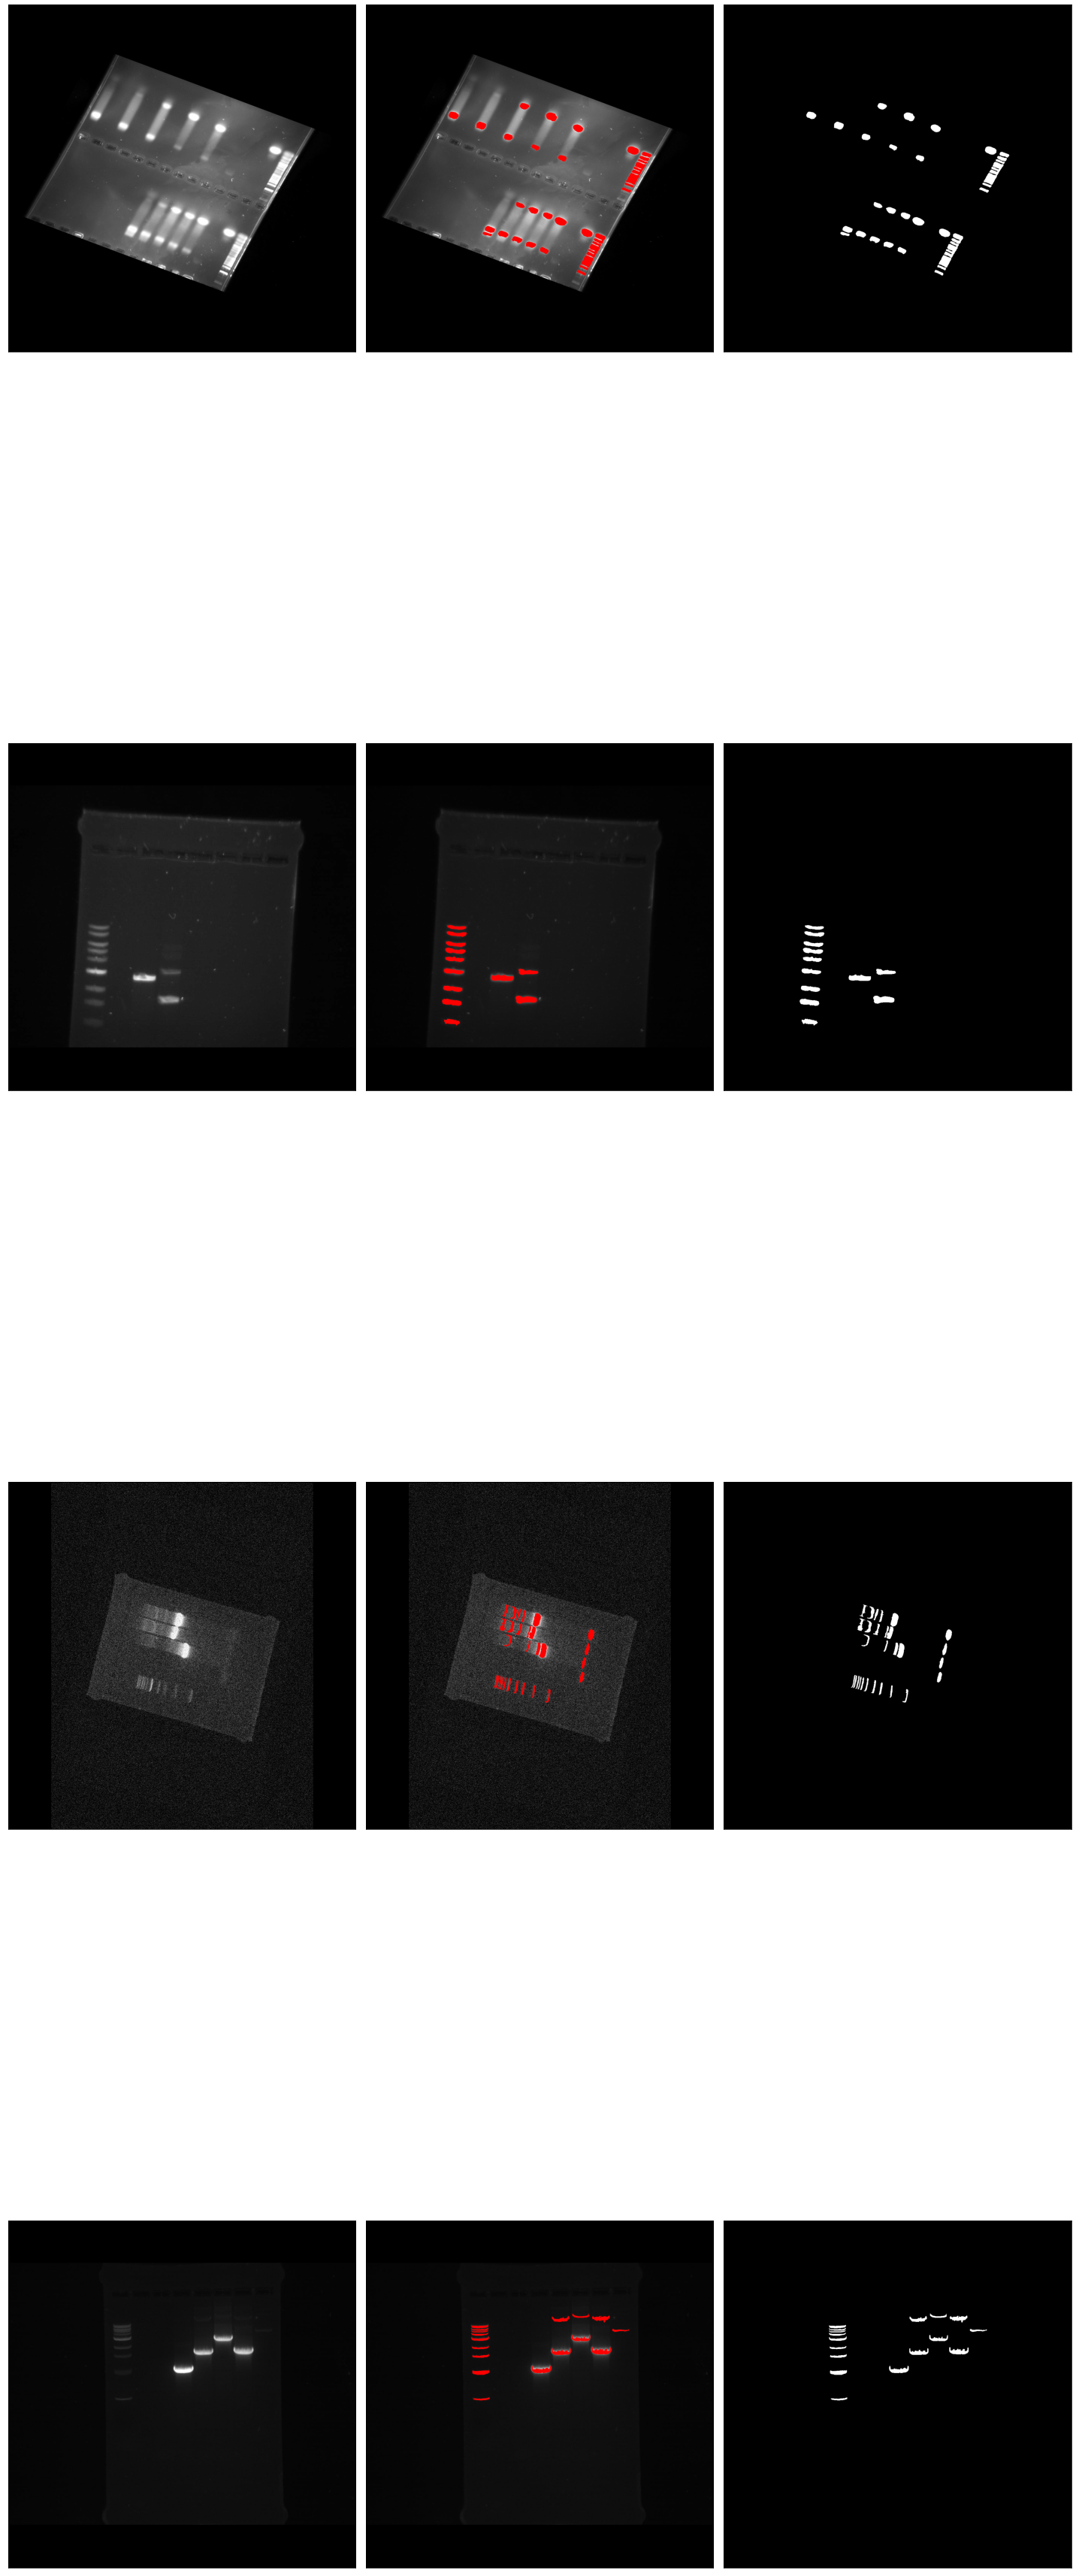

In [38]:
train_loader, val_loader, n_train, n_val = prep_dataloader(
    dir_train_img, dir_train_mask, dir_val_img, dir_val_mask, 
    n_channels, img_scale, val_percent, batch_size, num_workers, 
    apply_augmentations, padding)

# nrows = n_train
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize=(20,60))
count = 0

for batch in train_loader:
    images = batch['image']
    true_masks = batch['mask']
    for image, true_mask in zip(images, true_masks):
        image_array = image.squeeze().numpy()
        true_mask_array = true_mask.squeeze().numpy()
        
        combi_mask_array = np.zeros((1360, 1360, 3))
        for row in range(1360):
            for column in range(1360):
                if true_mask_array[row][column] == 1:
                    combi_mask_array[row][column] = [1, 0, 0]
                else:
                    combi_mask_array[row][column] = np.repeat(image_array[row][column], 3)
        
        axs[count][0].imshow(image_array, cmap='gray')
        
        axs[count][1].imshow(combi_mask_array)
        
        axs[count][2].imshow(true_mask_array, cmap='gray')
        
        print(count)
        count += 1

        
        
        
    break
# axs[0][0].set_title('Augmented Image')
# axs[0][1].set_title('Augmented Mask Superimposed')
# axs[0][2].set_title('Augmented Mask')
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])  # remove ticks
plt.tight_layout()
    

In [14]:
images.squeeze().numpy().shape

(1360, 1360)